In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

from thesis_tools.utils.data import *
from thesis_tools.models.bayesian_univariate_time_series import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
df = read_panel_data(observations_threshold=50)
df = df[df['group'] == 'U.S.']
# if more than 20 observations, use the last 20
if len(df) > 19:
    df = df.tail(19)

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_tools/utils/data.py:251: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_FTSE100['Date'] = pd.to_datetime(df_FTSE100['Date'])


In [3]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
108,U.S.,2004,41724.631629,3638.439941,4058.600098,4390.68,NaN,1053.699951,NaN,NaN,...,0.213867,0.390027,0.207644,NaN,0.315883,NaN,NaN,0.279053,0.058851,1
109,U.S.,2005,44123.407068,3913.689941,4254.850098,4852.31,NaN,1155.599976,NaN,NaN,...,0.072926,0.047221,0.099971,NaN,0.092312,NaN,NaN,0.043373,-0.288708,1
110,U.S.,2006,46302.000880,4947.990234,5674.149902,5760.26,NaN,1297.300049,NaN,NaN,...,0.234501,0.287861,0.171528,NaN,0.115666,NaN,NaN,0.080332,0.054076,1
111,U.S.,2007,48050.223777,5608.310059,6789.109863,6203.09,NaN,1515.400024,NaN,NaN,...,0.125268,0.179399,0.074065,NaN,0.155394,NaN,NaN,0.116498,0.795167,1
112,U.S.,2008,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
113,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
114,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1
115,U.S.,2011,50065.966504,4005.500000,7077.479980,5862.94,NaN,1331.699951,5505.899902,NaN,...,0.068727,0.232583,0.122203,NaN,0.173574,0.120255,NaN,0.180361,-0.068746,1
116,U.S.,2012,51784.418574,3298.550049,6458.910156,5681.61,NaN,1273.699951,5199.250000,NaN,...,-0.194185,-0.091457,-0.031417,NaN,-0.044530,-0.057306,NaN,0.020235,-0.196599,1
117,U.S.,2013,53291.127689,3732.600098,7776.049805,6276.88,NaN,1416.800049,6034.750000,NaN,...,0.123622,0.185588,0.099638,NaN,0.106475,0.149020,NaN,0.132339,0.039685,1


In [4]:
model = Univariate_Pareto_TimeSeries(
    panel_df=df
)

Panel is too long, truncating to 15 years


In [5]:
model.fit(target_accept=0.975, tune=2000, draws=2000)

In [6]:
trace = model.get_trace()

/Users/philipphocker/Documents/GitHub/top_wealth_thesis/thesis_venv/lib/python3.12/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (56), generating only 20 plots
  warnings.warn(


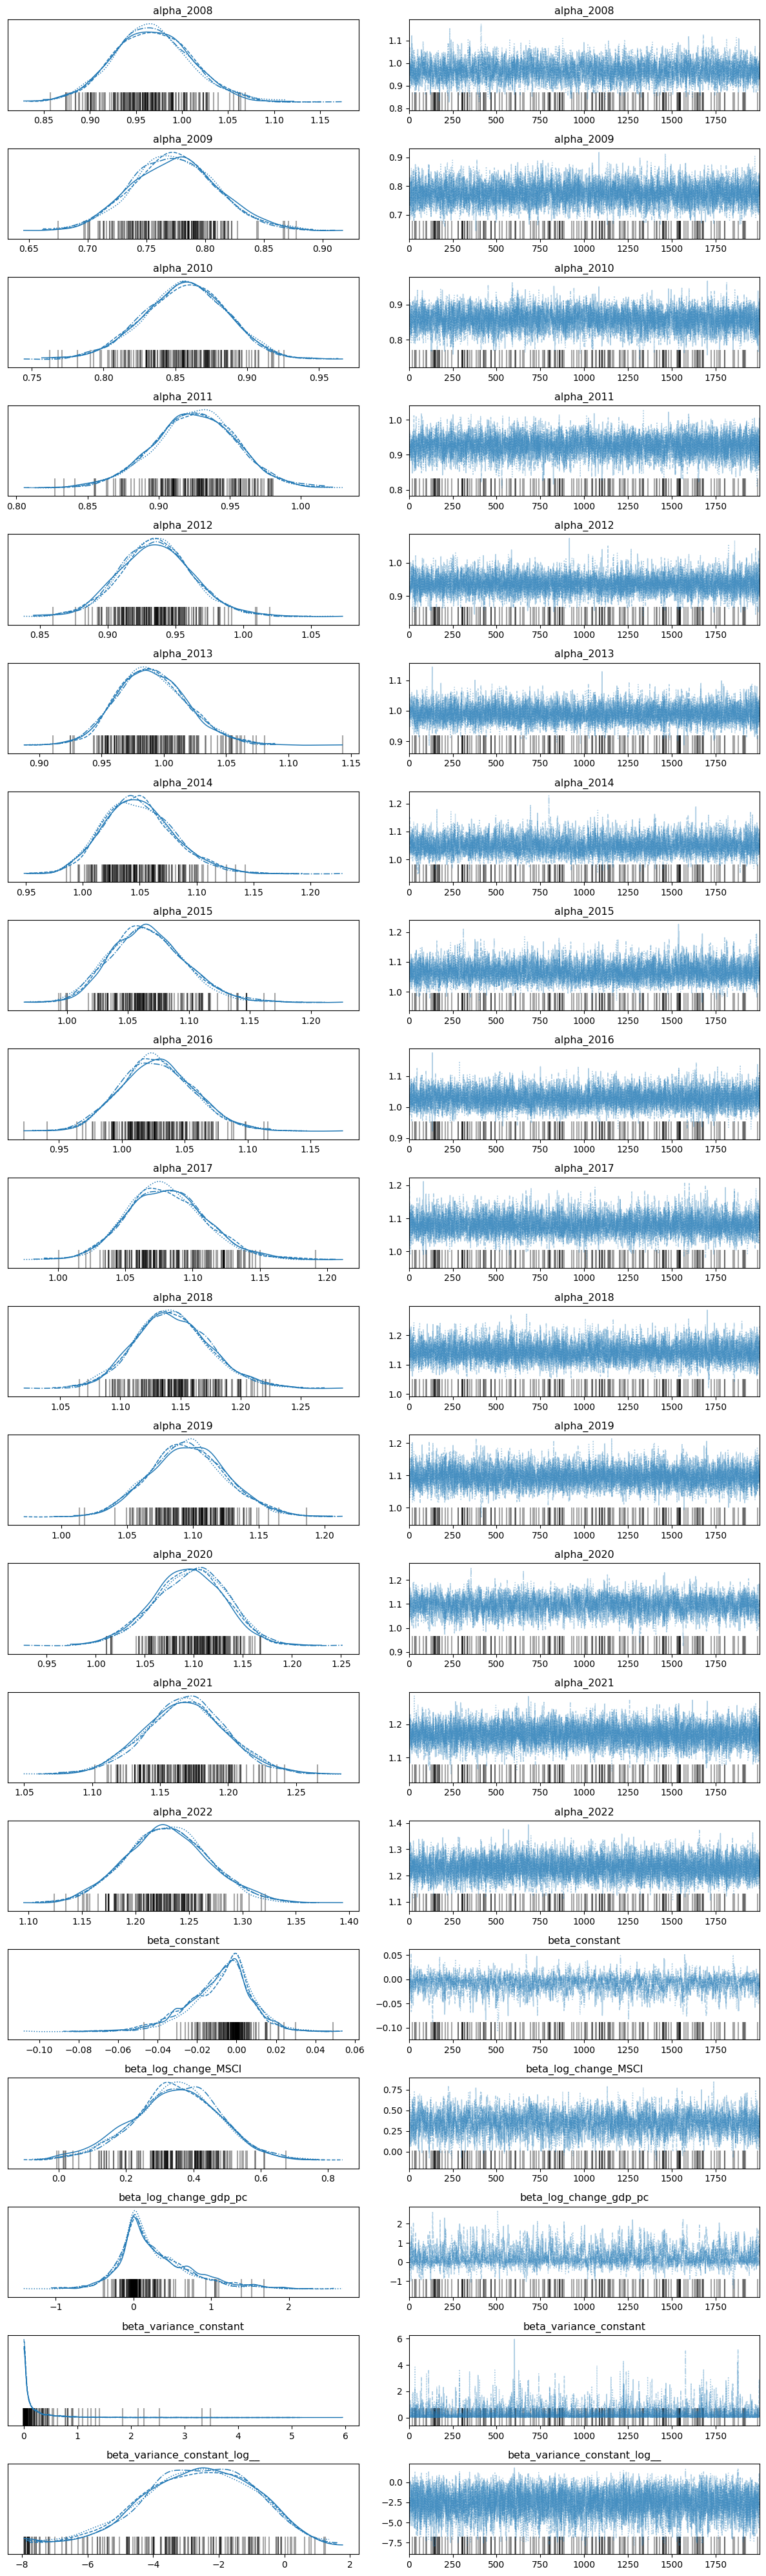

In [7]:
az.plot_trace(trace)
plt.tight_layout()

In [8]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha_2008,0.968,0.043,0.888,1.050,0.001,0.001,3595.0,3913.0,1.0
alpha_2009,0.774,0.036,0.707,0.844,0.001,0.000,4630.0,5949.0,1.0
alpha_2010,0.857,0.029,0.803,0.912,0.000,0.000,4339.0,5170.0,1.0
alpha_2011,0.926,0.029,0.869,0.979,0.000,0.000,5638.0,5835.0,1.0
alpha_2012,0.936,0.027,0.884,0.988,0.000,0.000,7206.0,5960.0,1.0
alpha_2013,0.991,0.029,0.941,1.048,0.000,0.000,6826.0,6117.0,1.0
alpha_2014,1.049,0.031,0.993,1.111,0.000,0.000,4134.0,5528.0,1.0
alpha_2015,1.067,0.031,1.011,1.125,0.000,0.000,5261.0,5292.0,1.0
alpha_2016,1.028,0.029,0.975,1.084,0.000,0.000,6983.0,6721.0,1.0
alpha_2017,1.081,0.030,1.024,1.134,0.000,0.000,6060.0,5631.0,1.0
